# First Simple Keras Example

In [13]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt

np.random.seed(1671) # for reproducibility

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16692476720213203092
]


In [3]:
# network and training
NB_EPOCH = 20 # with old model epoch=200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
RESHAPED = 784

In [4]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784

#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [5]:
# 10 outputs
# final stage is softmax

#model = Sequential()
#model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
#model.add(Activation('softmax'))
#model.summary()

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
__________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 47us/step - loss: 1.6413 - acc: 0.5604 - val_loss: 0.8180 - val_acc: 0.8107
Epoch 2/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.6143 - acc: 0.8380 - val_loss: 0.4513 - val_acc: 0.8742
Epoch 3/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.4314 - acc: 0.8795 - val_loss: 0.3646 - val_acc: 0.8968
Epoch 4/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.3670 - acc: 0.8966 - val_loss: 0.3243 - val_acc: 0.9076
Epoch 5/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.3314 - acc: 0.9059 - val_loss: 0.2981 - val_acc: 0.9149
Epoch 6/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.3062 - acc: 0.9121 - val_loss: 0.2774 - val_acc: 0.9211
Epoch 7/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.2869 - acc: 0.9172 - val_loss: 0.2638 - val_acc

In [8]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 22us/step
Test score: 0.16245522625669837
Test accuracy: 0.9515


In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

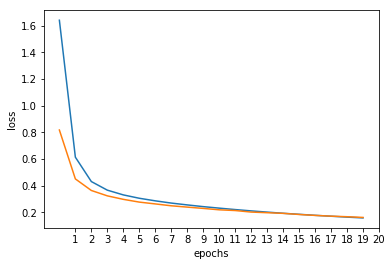

In [17]:
epoch_count = list(range(1, NB_EPOCH+1))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(epoch_count, epoch_count)
plt.show()